dataset ;
https://www.kaggle.com/datasets/tongpython/cat-and-dog

In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim 
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import torchvision.models as models

In [2]:
train_path= r"C:\Users\Amir\Desktop\cnn catdog pytorch\archive_3\training_set\training_set"
test_path=  r"C:\Users\Amir\Desktop\cnn catdog pytorch\archive_3\test_set\test_set"

In [3]:
size=224
transform = transforms.Compose([
    transforms.Resize((size, size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Corrected line
])

In [4]:
train_ds= dataset.ImageFolder(root=train_path, transform=transform)
test_ds= dataset.ImageFolder(root=test_path, transform=transform)

In [5]:
train_ds.class_to_idx

{'cats': 0, 'dogs': 1}

In [6]:
Batch_size=32 
train_dl=DataLoader(dataset=train_ds, batch_size=Batch_size , shuffle=True)
test_dl=DataLoader(dataset=test_ds, batch_size=Batch_size , shuffle=True)

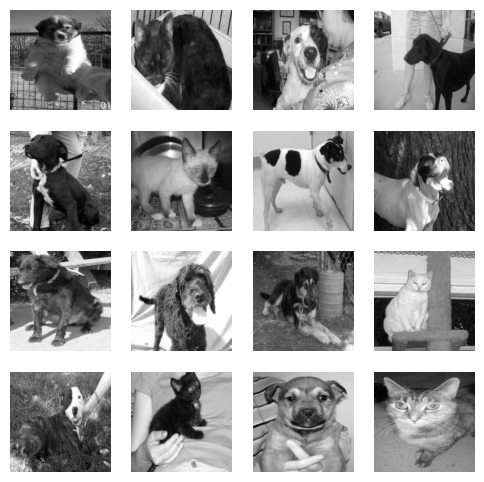

In [7]:
image ,target = next(iter(train_dl))
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(image[i,0], cmap='gray')
    plt.axis('off')
plt.show()

In [26]:
vgg16= models.vgg16(pretrained=True)

C:\Users\Amir\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Amir\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [27]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [28]:
# Freeze gradients for convolutional layers
for param in vgg16.features.parameters():
    param.requires_grad = False

In [29]:
vgg16.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [30]:
vgg16.classifier


Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [31]:
vgg16.forward

<bound method VGG.forward of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, st

In [32]:
vgg16.classifier[5]=nn.Identity()

vgg16.classifier


Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Identity()
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [33]:
vgg16.classifier=nn.Sequential(

    nn.Linear(in_features=25088, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=4096, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=4096, out_features=1000, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(1000,2)
  

)

In [34]:
vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
  (7): ReLU(inplace=True)
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=1000, out_features=2, bias=True)
)

In [35]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [37]:
vgg16.to(device)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [40]:
optimizer= optim.SGD(vgg16.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [41]:
epochs=20 

for i in range(epochs): 
    sumloss=0
    for idx, (image,label) in enumerate(train_dl): 
        image=image.to(device)
        label=label.to(device)
        
        optimizer.zero_grad()
        score=vgg16(image)
        loss=criterion(score ,label)
        sumloss+=loss
        loss.backward()
        optimizer.step()
    print(f'loss in epoch {i+1} is equal to {sumloss}')

loss in epoch 1 is equal to 138.56973266601562
loss in epoch 2 is equal to 56.29026794433594
loss in epoch 3 is equal to 25.819883346557617
loss in epoch 4 is equal to 18.154953002929688
loss in epoch 5 is equal to 14.313400268554688
loss in epoch 6 is equal to 12.543872833251953
loss in epoch 7 is equal to 10.36878490447998
loss in epoch 8 is equal to 9.247950553894043
loss in epoch 9 is equal to 8.493511199951172
loss in epoch 10 is equal to 8.033226013183594
loss in epoch 11 is equal to 6.953200340270996
loss in epoch 12 is equal to 6.217165946960449
loss in epoch 13 is equal to 6.251987934112549
loss in epoch 14 is equal to 5.516834735870361
loss in epoch 15 is equal to 5.4249267578125
loss in epoch 16 is equal to 5.038989067077637
loss in epoch 17 is equal to 4.765781402587891
loss in epoch 18 is equal to 4.3562703132629395
loss in epoch 19 is equal to 4.002050399780273
loss in epoch 20 is equal to 3.87190842628479


In [42]:
def checkaccuracy (dataloader, model): 
  
    
    num_correct=0
    num_samples=0

    vgg16.eval()

    with torch.no_grad():
        for x,y in dataloader:
            x=x.to(device)
            y=y.to(device)

            
            score=model(x)

            _,pred=score.max(1)
            num_correct+=(pred==y).sum()
            num_samples+=len(y)

        print(f'accuracy is equal to {num_correct/num_samples} ')
    model.train()

In [44]:
checkaccuracy(train_dl, vgg16)

accuracy is equal to 0.998001217842102 


In [45]:
checkaccuracy(test_dl, vgg16)

accuracy is equal to 0.9896193146705627 
